In [2]:
%pylab inline
import numpy as np

import seaborn as sns
import glob2
import pandas as pd
import h5py
from scipy.ndimage.filters import gaussian_filter
import natsort


Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_dataframe():
    file_ = '../Examples/output/tect_model_data.npz'
    out = np.load(file_)
    d = dict(out)
    df = pd.DataFrame.from_dict(d)
    return df 

In [4]:
#df = get_dataframe( )


In [35]:
df.head(2), df.shape

(     (1, 1)    (1, 2)    (2, 3)    (3, 3)  stepAtSave  timeAtSave
 0 -0.862069 -0.600000  0.200000  0.862069           0    0.000000
 1 -0.862069 -0.596252  0.217388  0.862069           5    0.000001, (41, 6))

In [1]:
velScale = 3.4482758620689656e-13*(3600*24*365)*100.  #cm/y
timeScale = 8.41e+18/(1e6*3600*24*365)    
G = 6.67e-11         #grav. constant
gravFac = 2.*np.pi*G*1e5 
tempFac = 373230000.0
stressFac = 1.21332718581

NameError: name 'np' is not defined

## Gravity

In [5]:
def listify_data(unique_string, path):
    glob_str = path + '*' + unique_string + '*'
    files = natsort.natsort(glob2.glob(glob_str))
    #print(glob_str)
    #return files
    
    dataList = []
    for f in files:
        with h5py.File(f,'r') as hf:
            data = hf.get('data')
            dataList.append(np.array(data))
    return dataList

In [31]:
#vx = listify_data('surfVx', '../Examples/output/files/')

gravTempFiles = listify_data('gravTemp_**', '../models/results/T/15/files/')
gravStressFiles = listify_data('gravStress_**', '../models/results/T/15/files/')

In [63]:
interfaceFiles = listify_data('interface**', '../models/results/T/15/files/')
len(interfaceFiles )

65

In [65]:
xs = np.linspace(-0.7172413793103448, 0.7172413793103448, len(gravTempFiles[0]))

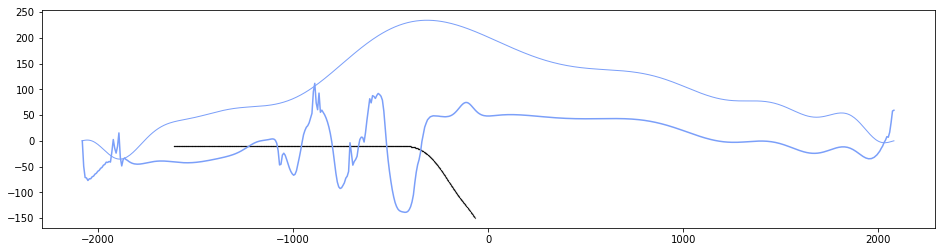

In [87]:
cs = sns.color_palette("coolwarm", len(gravTempFiles [0::20]))

fig, ax = plt.subplots(figsize=(16,4))
ci = 0
for i in range(30, 31, 5):
    
    gravT = gravTempFiles[i]*tempFac*gravFac
    plt.plot(xs*2900.0,-1.*gravT + gravT[0], c=cs[ci], lw = 1.)
    
    gravS = gravStressFiles[i]*stressFac*gravFac
    #plt.plot(xs*2900.0, gravS - gravS[0], c=cs[ci], lw = 1.)
    
    gravTot = (gravS - gravS[0]) + (-1.*gravT + gravT[0])
    plt.plot(xs*2900.0,gravTot, c=cs[ci], lw = 1.5)
    
    plt.scatter(interfaceFiles[i][:,0]*2900.0, -1.*(1. - interfaceFiles[i][:,1])*2900.0,c='k', s=0.02)
    
    ci  += 1


In [75]:
interfaceFiles[i].shape

(1497, 2)